<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-11 00:26:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  58.6MB/s    in 3.5s    

2025-06-11 00:26:16 (58.1 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


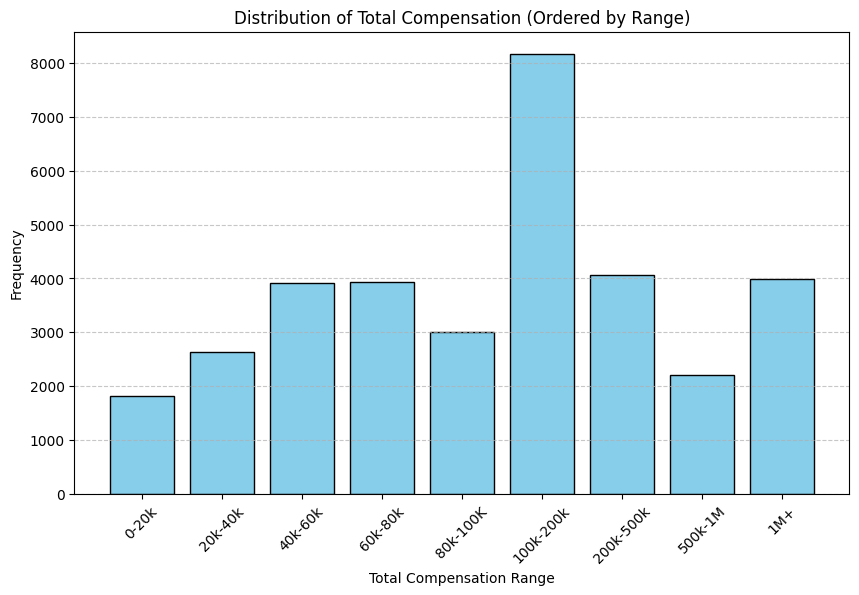

In [9]:
## Write your code here

onn = sqlite3.connect('survey-data.sqlite')

QUERY = """
SELECT 
    CASE 
         WHEN CompTotal < 20000 THEN '0-20k'
         WHEN CompTotal >= 20000 AND CompTotal < 40000 THEN '20k-40k'
         WHEN CompTotal >= 40000 AND CompTotal < 60000 THEN '40k-60k'
         WHEN CompTotal >= 60000 AND CompTotal < 80000 THEN '60k-80k'
         WHEN CompTotal >= 80000 AND CompTotal < 100000 THEN '80k-100K'
         WHEN CompTotal >= 100000 AND CompTotal < 200000 THEN '100k-200k'
         WHEN CompTotal >= 200000 AND CompTotal < 500000 THEN '200k-500k'
         WHEN CompTotal >= 500000 AND CompTotal < 1000000 THEN '500k-1M'
         ELSE '1M+'
    END AS CompTotalRange,
    COUNT(*) AS Frequency
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotalRange;
"""

df_CompTotal = pd.read_sql_query(QUERY, conn)


comp_order = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100K', 
              '100k-200k', '200k-500k', '500k-1M', '1M+']

df_CompTotal['CompTotalRange'] = pd.Categorical(df_CompTotal['CompTotalRange'], categories=comp_order, ordered=True)

df_CompTotal = df_CompTotal.sort_values('CompTotalRange')

plt.figure(figsize=(10, 6))
plt.bar(df_CompTotal['CompTotalRange'], df_CompTotal['Frequency'], color='skyblue', edgecolor='black')
plt.xlabel('Total Compensation Range')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation (Ordered by Range)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
 

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


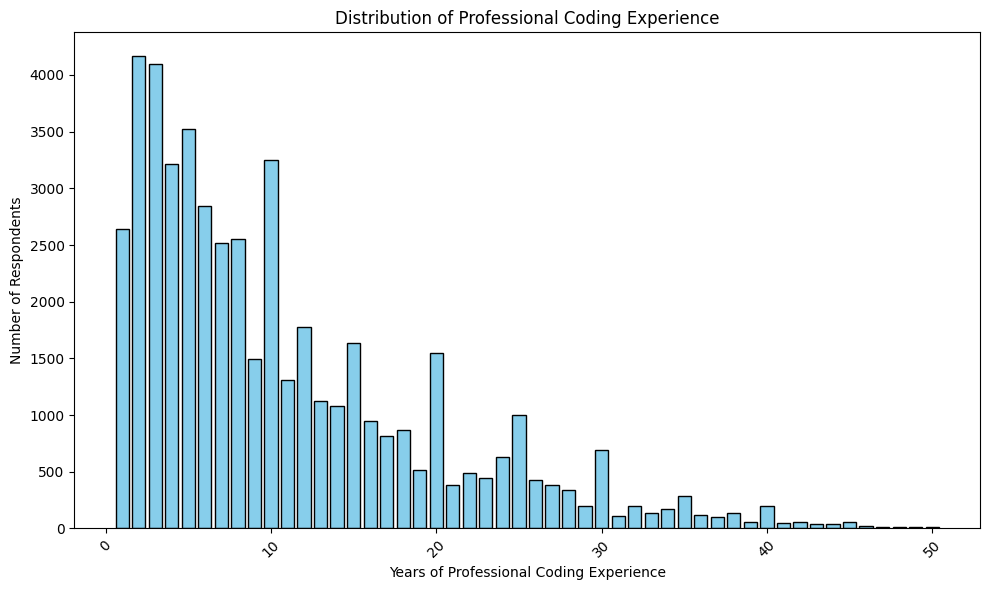

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to database
conn = sqlite3.connect('survey-data.sqlite')

# Corrected query
query = """
SELECT YearsCodePro, COUNT(*) AS Frequency
FROM main
WHERE YearsCodePro IS NOT NULL
GROUP BY YearsCodePro
"""

# Read query results into DataFrame
df = pd.read_sql_query(query, conn)

# Optional: clean YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna().sort_values('YearsCodePro')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df['YearsCodePro'], df['Frequency'], color='skyblue', edgecolor='black')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Professional Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


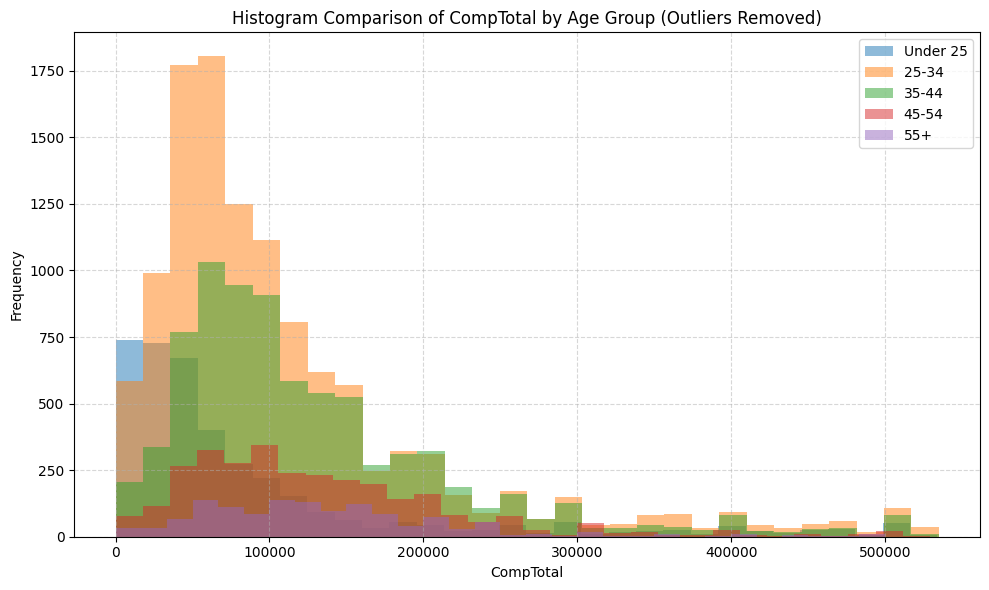

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Load data
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Step 2: Clean and convert
df['Age'] = pd.to_numeric(df['Age'].str.extract(r'(\d+)')[0], errors='coerce')
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['Age', 'CompTotal'])

# Step 3: Remove outliers using IQR
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Step 4: Create age groups
bins = [0, 24, 34, 44, 54, float('inf')]
labels = ['Under 25', '25-34', '35-44', '45-54', '55+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 5: Plot histograms
plt.figure(figsize=(10, 6))
for group in labels:
    subset = df[df['AgeGroup'] == group]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=group)

plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.title('Histogram Comparison of CompTotal by Age Group (Outliers Removed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


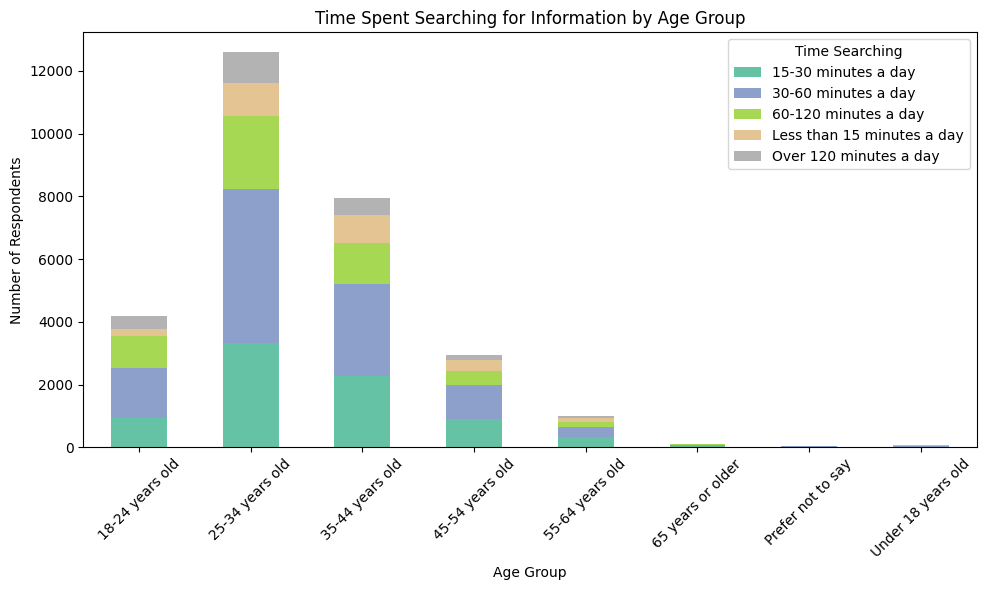

In [12]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')

query = """
SELECT 
    Age, 
    TimeSearching, 
    COUNT(*) as Frequency 
FROM main 
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL 
GROUP BY Age, TimeSearching
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Pivot to reshape for stacked bar plot
search_dist = df.pivot(index='Age', columns='TimeSearching', values='Frequency').fillna(0)

# Plot
search_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Time Spent Searching for Information by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Time Searching')
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


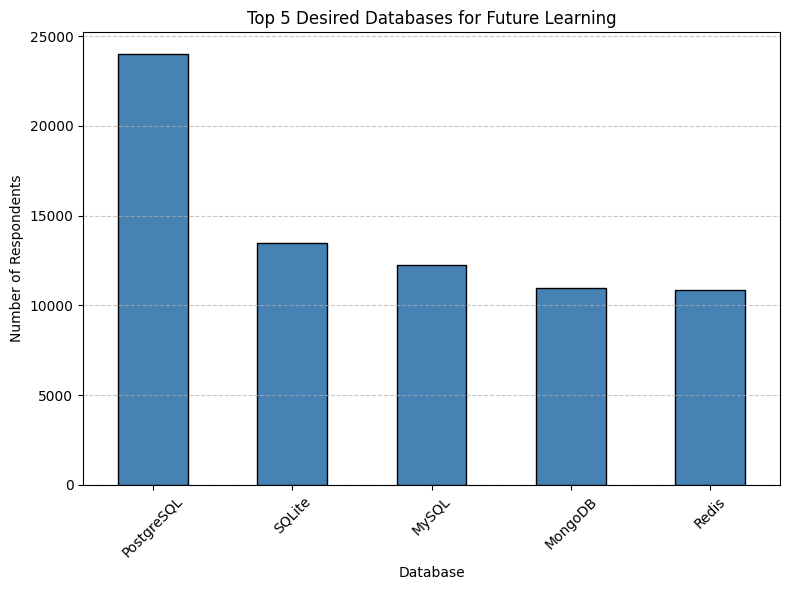

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect and load data
conn = sqlite3.connect('survey-data.sqlite')
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Split multiple responses (e.g., "MySQL;MongoDB") into separate rows
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')

# Count the top 5 databases
top_dbs = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5)

# Plot as a bar chart
plt.figure(figsize=(8, 6))
top_dbs.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 5 Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


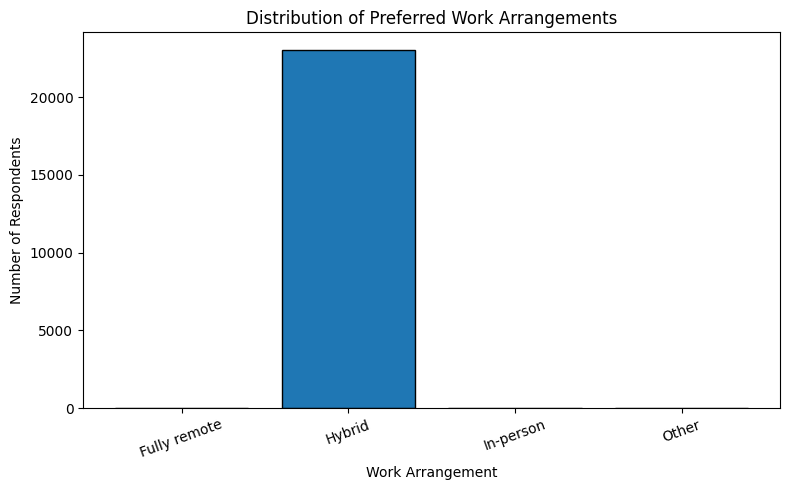

In [16]:
## Write your code 

asyncimport pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Load data
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Convert categories to numeric values (for histogram)
remote_mapping = {
    "Fully remote": 0,
    "Hybrid (some remote, some in-person)": 1,
    "Fully in-person": 2,
    "Other": 3
}
df['RemoteWorkNumeric'] = df['RemoteWork'].map(remote_mapping)

# Step 3: Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['RemoteWorkNumeric'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black', rwidth=0.8)

# Step 4: Custom x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=["Fully remote", "Hybrid", "In-person", "Other"], rotation=20)
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


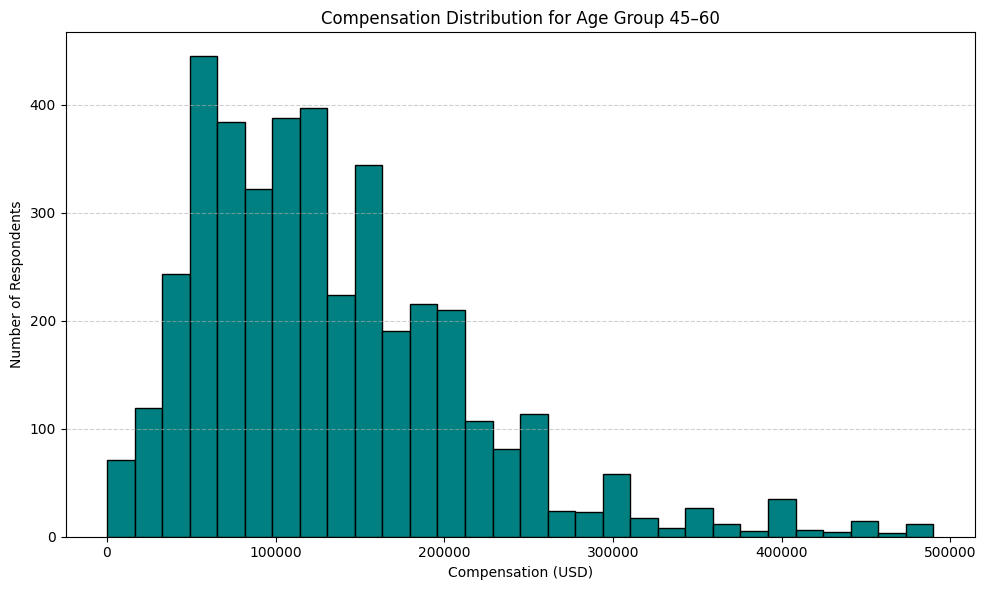

In [17]:
## Write your code 

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect and extract relevant data
conn = sqlite3.connect('survey-data.sqlite')
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Filter Age group 45–60
age_filter = ['45-54 years old', '55-64 years old']
df_filtered = df[df['Age'].isin(age_filter)].copy()

# Step 3: Remove extreme compensation outliers (e.g., above 500,000)
df_filtered = df_filtered[(df_filtered['CompTotal'] > 0) & (df_filtered['CompTotal'] < 500000)]

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=30, color='teal', edgecolor='black')
plt.title('Compensation Distribution for Age Group 45–60')
plt.xlabel('Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


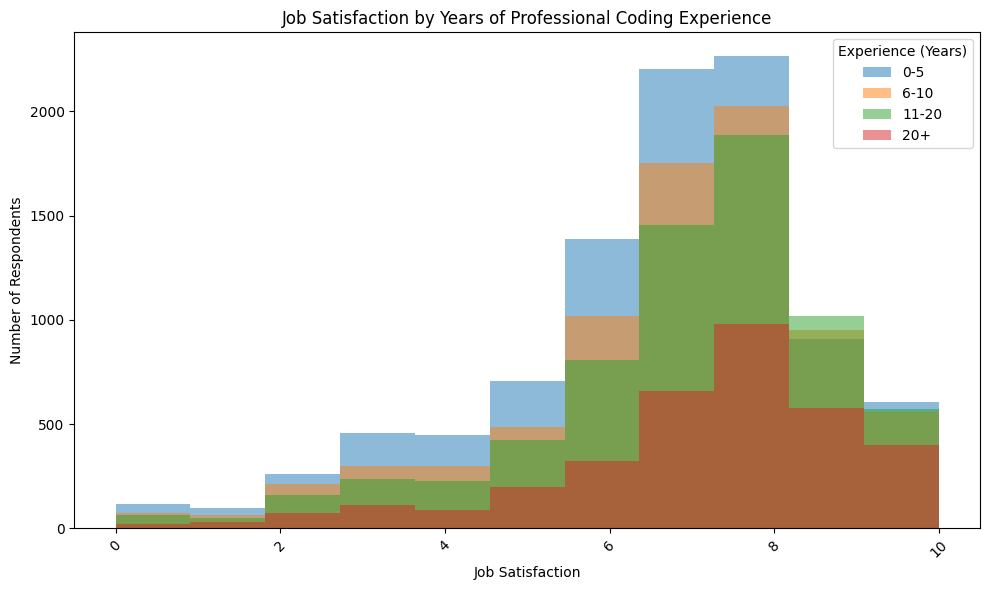

In [18]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Load relevant data
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT YearsCodePro, JobSat FROM main WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Clean YearsCodePro column
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna(subset=['YearsCodePro'])

# Step 3: Create experience bins
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '6-10', '11-20', '20+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Step 4: Plot histogram for each experience group
plt.figure(figsize=(10, 6))
for label in labels:
    group = df[df['ExperienceGroup'] == label]
    plt.hist(group['JobSat'], bins=len(df['JobSat'].unique()), alpha=0.5, label=label)

plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.legend(title='Experience (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [19]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
